In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadDataSet(fileName):
    dataList = []
    with open(fileName) as fr:
        for line in fr.readlines():
            curLine = line.strip().split('\t')
            fltLine = list(map(float,curLine))
            dataList.append(fltLine)
    return dataList

In [9]:
def randCent(dataSet, k):
    n = np.shape(dataSet)[1] # n表示数据集的维度
    centroids = np.mat(np.zeros((k,n)))
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = np.mat(minJ + rangeJ * np.random.rand(k,1))
    return centroids

In [4]:
def kMeans(dataSet, k):
    '''
    KMeans算法，返回最终的质心坐标和每个点所在的簇
    '''
    m = np.shape(dataSet)[0] # m表示数据集的长度（个数）
    clusterAssment = np.mat(np.zeros((m,2)))

    centroids = randCent(dataSet, k) # 保存k个初始质心的坐标
    clusterChanged = True
    iterIndex=1 # 迭代次数
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = np.inf; minIndex = -1
            for j in range(k):
                distJI = np.linalg.norm(np.array(centroids[j,:])-np.array(dataSet[i,:]))
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
            print("第%d次迭代后%d个质心的坐标:\n%s"%(iterIndex,k,centroids)) # 第一次迭代的质心坐标就是初始的质心坐标
            iterIndex+=1
        for cent in range(k):
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = np.mean(ptsInClust, axis=0)
    return centroids, clusterAssment

In [5]:
def showCluster(dataSet, k, centroids, clusterAssment):
    numSamples, dim = dataSet.shape
    if dim != 2:
        return 1

    mark = ['or', 'ob', 'og', 'ok','oy','om','oc', '^r', '+r', 'sr', 'dr', '<r', 'pr']

    # draw all samples
    for i in range(numSamples):
        markIndex = int(clusterAssment[i, 0])
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])

    mark = ['Pr', 'Pb', 'Pg', 'Pk','Py','Pm','Pc','^b', '+b', 'sb', 'db', '<b', 'pb']
    # draw the centroids
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 12)

    plt.show()

第1次迭代后4个质心的坐标:
[[-3.43054731 -2.19942996]
 [-0.25097246  2.64549195]
 [-4.60826674  2.20741023]
 [-1.39321506 -0.68748797]]
第2次迭代后4个质心的坐标:
[[-3.43054731 -2.19942996]
 [-0.25097246  2.64549195]
 [-4.60826674  2.20741023]
 [-1.39321506 -0.68748797]]
第3次迭代后4个质心的坐标:
[[-3.43054731 -2.19942996]
 [-0.25097246  2.64549195]
 [-4.60826674  2.20741023]
 [-1.39321506 -0.68748797]]
第4次迭代后4个质心的坐标:
[[-3.43054731 -2.19942996]
 [-0.25097246  2.64549195]
 [-4.60826674  2.20741023]
 [-1.39321506 -0.68748797]]
第5次迭代后4个质心的坐标:
[[-3.43054731 -2.19942996]
 [-0.25097246  2.64549195]
 [-4.60826674  2.20741023]
 [-1.39321506 -0.68748797]]
第6次迭代后4个质心的坐标:
[[-3.43054731 -2.19942996]
 [-0.25097246  2.64549195]
 [-4.60826674  2.20741023]
 [-1.39321506 -0.68748797]]
第7次迭代后4个质心的坐标:
[[-3.43054731 -2.19942996]
 [-0.25097246  2.64549195]
 [-4.60826674  2.20741023]
 [-1.39321506 -0.68748797]]
第8次迭代后4个质心的坐标:
[[-3.43054731 -2.19942996]
 [-0.25097246  2.64549195]
 [-4.60826674  2.20741023]
 [-1.39321506 -0.68748797]]
第9次迭代后4个

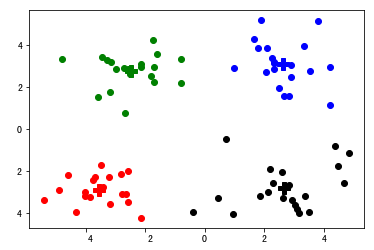

In [10]:
    dataMat = np.mat(loadDataSet('C:\\Users\\jinkuic\\assignment\\CV\\test')) #mat是numpy中的函数，将列表转化成矩阵

    k = 4 # 选定k值，也就是簇的个数
    cent, clust = kMeans(dataMat, k)

    showCluster(dataMat, k, cent, clust)